In [14]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Setting seaborn color palette
palette = sns.set_palette('Set2')

In [16]:
data = pd.read_csv('customer_acquisition_data.csv')
data.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      800 non-null    int64  
 1   channel          800 non-null    object 
 2   cost             800 non-null    float64
 3   conversion_rate  800 non-null    float64
 4   revenue          800 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 31.4+ KB


In [18]:
data.describe()

,customer_id,cost,conversion_rate,revenue
count,800.0000,800.000000,800.000000,800.000000
mean,400.5000,13.148052,0.086305,2769.151250
std,231.0844,9.922337,0.059611,1259.543706
min,1.0000,5.246263,0.016341,500.000000
25%,200.7500,5.246263,0.043822,1694.000000
50%,400.5000,8.320327,0.043822,2764.000000
75%,600.2500,9.546326,0.123145,3824.250000
max,800.0000,30.450327,0.167592,4998.000000


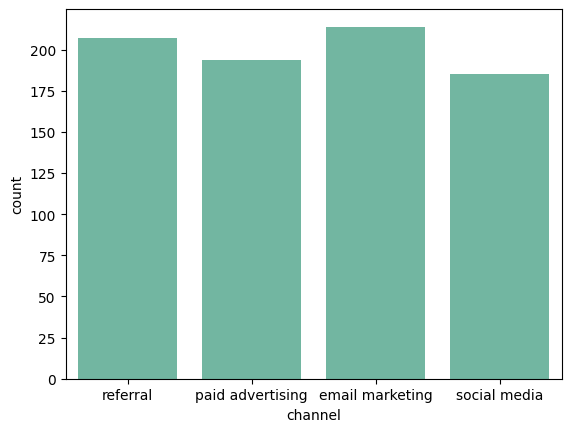

In [20]:
sns.countplot(data, x='channel');

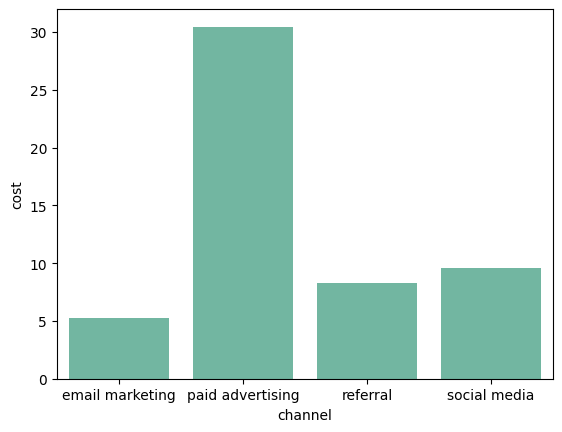

In [21]:
# Grouping the data based on 'channel'
channel_groups = data.groupby('channel')
# Aggregating 'cost' for each channel group
cost_by_channel = channel_groups['cost'].mean().reset_index()

sns.barplot(cost_by_channel, x='channel', y='cost');

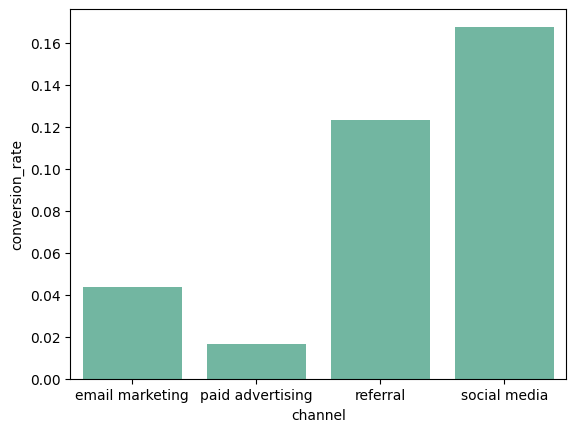

In [22]:
# Aggregating 'conversion_rate' for each channel group
conversion_rate_by_channel = channel_groups['conversion_rate'].mean().reset_index()

sns.barplot(conversion_rate_by_channel, x='channel', y='conversion_rate');

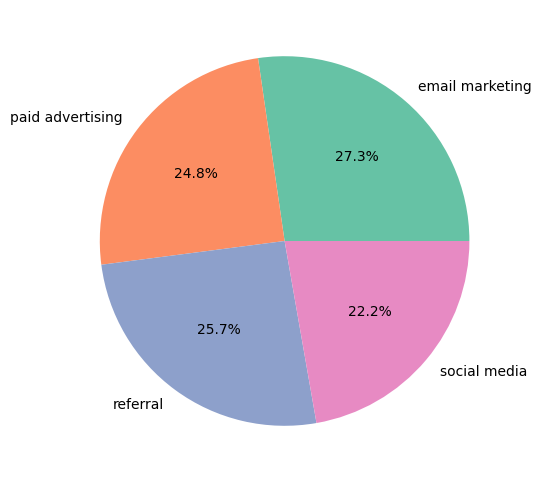

In [23]:
revenue_by_channel = channel_groups['revenue'].sum().reset_index()

fig, ax = plt.subplots(figsize=(8, 6))
plt.pie(revenue_by_channel['revenue'], labels=revenue_by_channel['channel'], autopct='%1.1f%%');

In [24]:
data['roi'] = (data['revenue'] - data['cost']) / data['cost']
data.head()

,customer_id,channel,cost,conversion_rate,revenue,roi
0,1,referral,8.320327,0.123145,4199,503.667681
1,2,paid advertising,30.450327,0.016341,3410,110.985660
2,3,email marketing,5.246263,0.043822,3164,602.095925
3,4,social media,9.546326,0.167592,1520,158.223564
4,5,referral,8.320327,0.123145,2419,289.733775


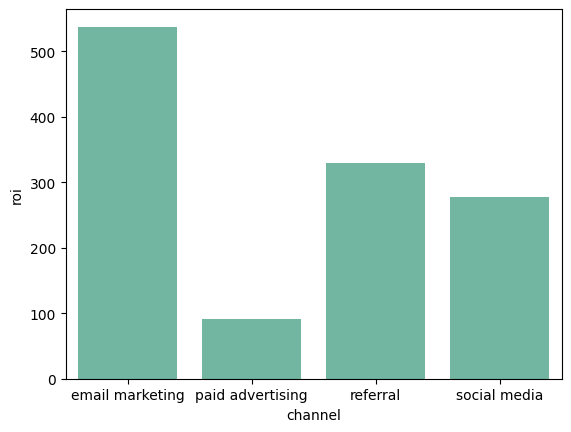

In [25]:
roi_by_channel = data.groupby('channel')['roi'].mean().reset_index()

sns.barplot(roi_by_channel, x='channel', y='roi');

In [27]:
data['cltv'] = (data['revenue'] - data['cost']) * data['conversion_rate'] / data['cost']
data.head()

,customer_id,channel,cost,conversion_rate,revenue,roi,cltv
0,1,referral,8.320327,0.123145,4199,503.667681,62.024146
1,2,paid advertising,30.450327,0.016341,3410,110.985660,1.813671
2,3,email marketing,5.246263,0.043822,3164,602.095925,26.385185
3,4,social media,9.546326,0.167592,1520,158.223564,26.517043
4,5,referral,8.320327,0.123145,2419,289.733775,35.679260


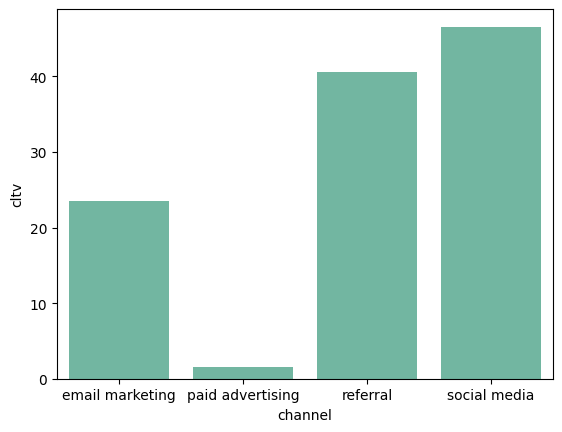

In [28]:
cltv_by_channel = data.groupby('channel')['cltv'].mean().reset_index()

sns.barplot(cltv_by_channel, x='channel', y='cltv');